In [21]:
#loading python packages
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential
from keras.models import model_from_json
import pickle
from sklearn.decomposition import PCA
import os
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier


In [22]:
#defining class labels
labels = ["Ham", "Phishing", "Spam"]

In [23]:
#reading and displaying dataset
dataset = pd.read_csv('Dataset/dataset_HSP.csv')
display(dataset)

,body_forms,body_html,body_noCharacters,body_noDistinctWords,body_noFunctionWords,body_noWords,body_richness,body_suspension,body_verifyYourAccount,script_javaScript,...,url_noDomains,url_noExtLinks,url_noImgLinks,url_noIntLinks,url_noIpAddresses,url_noLinks,url_noPorts,url_nonModalHereLinks,url_ports,label
0,False,False,257,40,2,46,0.178988,False,False,False,...,2,1,0,0,0,1,0,False,False,S
1,False,False,579,65,3,77,0.132988,False,False,False,...,3,2,0,0,1,2,0,False,False,S
2,False,True,14972,1146,7,2395,0.159965,False,False,False,...,3,1,1,0,0,1,0,False,False,S
3,False,True,1042,127,3,174,0.166987,False,False,False,...,4,2,0,0,0,2,0,False,False,S
4,True,True,9205,427,4,968,0.105160,False,False,False,...,8,28,16,3,1,31,0,False,False,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,False,True,38508,820,9,1296,0.033655,True,False,False,...,7,11,14,10,0,21,0,False,False,P
3840,False,True,10938,395,15,1165,0.106509,False,False,False,...,9,13,9,5,0,18,0,False,False,P
3841,False,True,1181,80,2,115,0.097375,False,False,False,...,3,1,0,1,0,2,0,False,False,P
3842,False,True,93089,1211,0,1215,0.013052,False,False,False,...,2,0,0,0,0,0,0,False,False,P


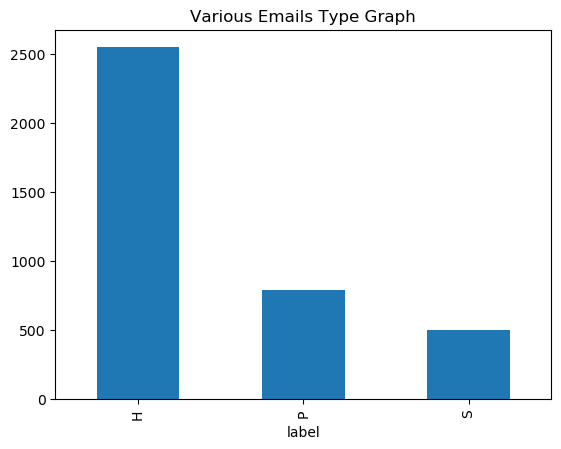

In [24]:
#graph of total ham, phishing and spam
label = dataset.groupby('label').size()
label.plot(kind="bar")
plt.title("Various Emails Type Graph")
plt.show()

In [25]:
#features extraction & preprocessing to remove missing values and then convert all non-numeric data into numeric
dataset.fillna(0, inplace = True)
le = LabelEncoder()
dataset['label'] = pd.Series(le.fit_transform(dataset['label'].astype(str)))
dataset.replace({False: 0, True: 1}, inplace=True)
display(dataset)

,body_forms,body_html,body_noCharacters,body_noDistinctWords,body_noFunctionWords,body_noWords,body_richness,body_suspension,body_verifyYourAccount,script_javaScript,...,url_noDomains,url_noExtLinks,url_noImgLinks,url_noIntLinks,url_noIpAddresses,url_noLinks,url_noPorts,url_nonModalHereLinks,url_ports,label
0,0,0,257,40,2,46,0.178988,0,0,0,...,2,1,0,0,0,1,0,0,0,2
1,0,0,579,65,3,77,0.132988,0,0,0,...,3,2,0,0,1,2,0,0,0,2
2,0,1,14972,1146,7,2395,0.159965,0,0,0,...,3,1,1,0,0,1,0,0,0,2
3,0,1,1042,127,3,174,0.166987,0,0,0,...,4,2,0,0,0,2,0,0,0,2
4,1,1,9205,427,4,968,0.105160,0,0,0,...,8,28,16,3,1,31,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,0,1,38508,820,9,1296,0.033655,1,0,0,...,7,11,14,10,0,21,0,0,0,1
3840,0,1,10938,395,15,1165,0.106509,0,0,0,...,9,13,9,5,0,18,0,0,0,1
3841,0,1,1181,80,2,115,0.097375,0,0,0,...,3,1,0,1,0,2,0,0,0,1
3842,0,1,93089,1211,0,1215,0.013052,0,0,0,...,2,0,0,0,0,0,0,0,0,1


In [26]:
#features selection using PCA (principal component analysis)
features = dataset.values
X = features[:,0:features.shape[1]-1]
Y = features[:,features.shape[1]-1]
all_features = features[:,0:features.shape[1]-1]
print()
print("Total features available in dataset before applying PCA Features Selection : "+str(X.shape[1]))
pca = PCA(n_components=35)
X = pca.fit_transform(X)
print("Total features available in dataset after applying PCA Features Selection : "+str(X.shape[1]))


Total features available in dataset before applying PCA Features Selection : 40
Total features available in dataset after applying PCA Features Selection : 35


In [27]:
#shuffling and splitting dataset into train and test
indices = np.arange(X.shape[0]) #shuffling the images
np.random.shuffle(indices)
X = X[indices]
all_features = all_features[indices]
Y = Y[indices]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #split dataset into train and test
all_X_train, all_X_test, all_y_train, all_y_test = train_test_split(all_features, Y, test_size=0.2) #split dataset into train and test
print()
print("Dataset Train and Test Split")
print("80% records used to train Deep Learning algorithm : "+str(X_train.shape[0]))
print("20% records used to test Deep Learning algorithm  : "+str(X_test.shape[0]))
print()


Dataset Train and Test Split
80% records used to train Deep Learning algorithm : 3075
20% records used to test Deep Learning algorithm  : 769



In [28]:
accuracy = []
precision = []
recall = []
fscore = []

In [29]:
#function to calculate various metrics such as accuracy, precison, recall, fscore and confusion matrix 
def calculateMetrics(algorithm, predict, y_test):
    a = accuracy_score(y_test,predict)*100
    p = precision_score(y_test, predict,average='macro') * 100
    r = recall_score(y_test, predict,average='macro') * 100
    f = f1_score(y_test, predict,average='macro') * 100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print()
    print(algorithm+" FSCORE  :  "+str(f))
    print(algorithm+" Accuracy  :  "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print()
    conf_matrix = confusion_matrix(y_test, predict) 
    plt.figure(figsize =(6, 6)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,3])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()


Logistic Regression FSCORE  :  74.49871025813196
Logistic Regression Accuracy  :  85.95578673602081
Logistic Regression Precision : 81.48663485021622
Logistic Regression Recall    : 71.20762800917774



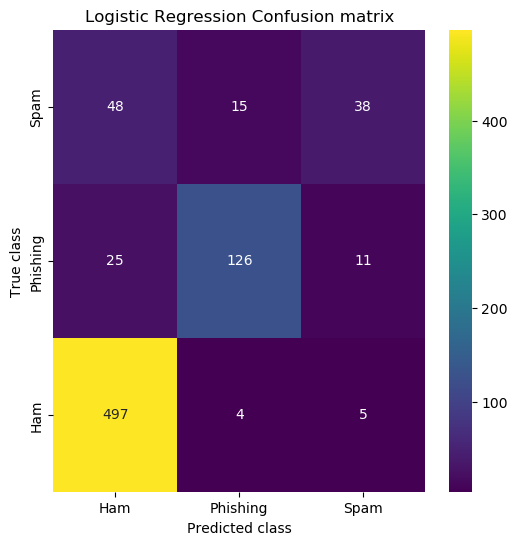

In [30]:
#logistic Regression classification
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
calculateMetrics("Logistic Regression", predict, y_test)


SVM FSCORE  :  47.76394444694144
SVM Accuracy  :  75.03250975292588
SVM Precision : 49.74214382109119
SVM Recall    : 48.78169781551424



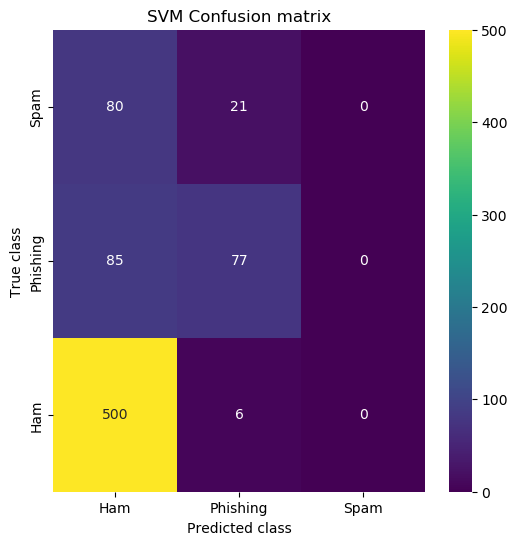

In [31]:
#SVM classification
svm_cls = svm.SVC()
svm_cls.fit(X_train, y_train)
predict = svm_cls.predict(X_test)
calculateMetrics("SVM", predict, y_test)


Naive Bayes FSCORE  :  57.39018977655341
Naive Bayes Accuracy  :  76.59297789336802
Naive Bayes Precision : 70.41219670242639
Naive Bayes Recall    : 53.860539032969314



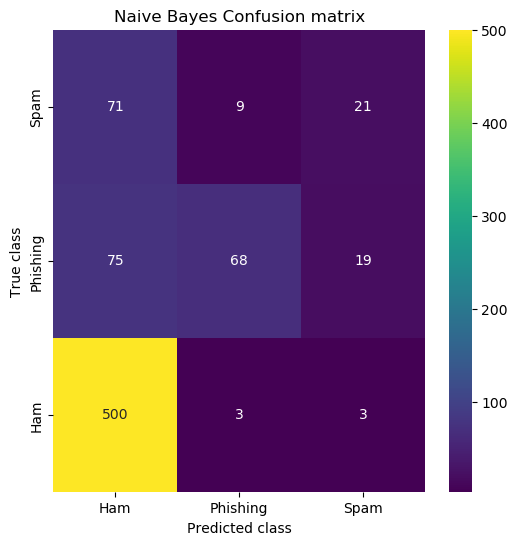

In [32]:
#Naive Bayes classification
nb = GaussianNB()
nb.fit(X_train, y_train)
predict = nb.predict(X_test)
calculateMetrics("Naive Bayes", predict, y_test)


AdaBoost FSCORE  :  84.58555831226126
AdaBoost Accuracy  :  91.15734720416124
AdaBoost Precision : 85.75258488301967
AdaBoost Recall    : 83.58588676903118



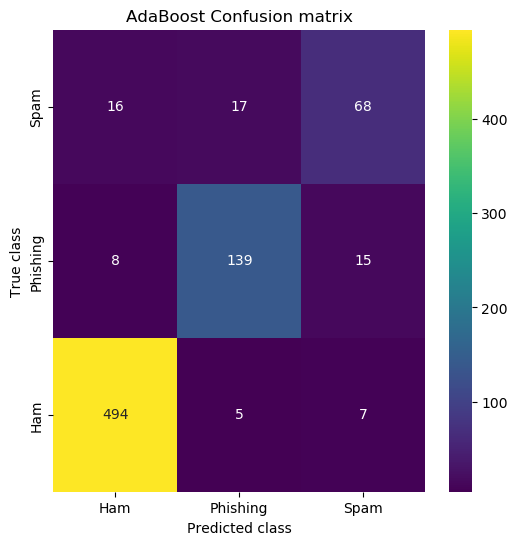

In [33]:
#AdaBoost classification
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
predict = ada.predict(X_test)
calculateMetrics("AdaBoost", predict, y_test)

In [34]:
Y1 = Y
X1 = X
Y = to_categorical(Y)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X = X.reshape(X.shape[0], X.shape[1], 1, 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)
all_X_train = all_X_train.reshape(all_X_train.shape[0], all_X_train.shape[1], 1, 1)
all_X_test =all_X_test.reshape(all_X_test.shape[0], all_X_test.shape[1], 1, 1)
print(X_train.shape)

(3075, 35, 1, 1)



Deep Learning Algorithm with basic features FSCORE  :  79.89258703445459
Deep Learning Algorithm with basic features Accuracy  :  90.50715214564369
Deep Learning Algorithm with basic features Precision : 89.80946743975343
Deep Learning Algorithm with basic features Recall    : 78.27743575442963



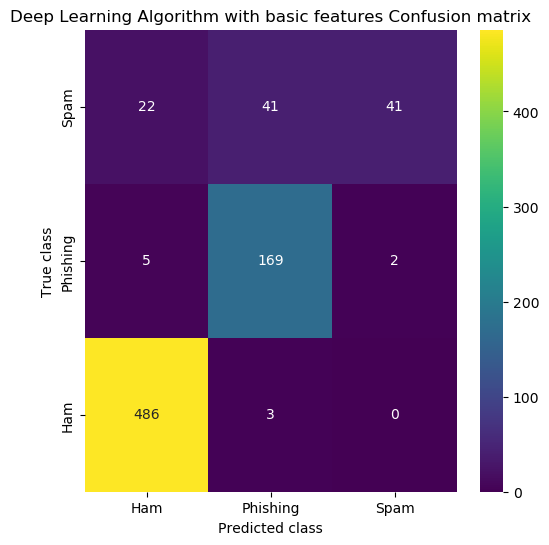

In [35]:
all_y_train = to_categorical(all_y_train)
all_y_test = to_categorical(all_y_test)
#if model already trained then load it and this model get trained with all features
if os.path.exists('model/all_features_model.json'):
    with open('model/all_features_model.json', "r") as json_file:
        loaded_model_json = json_file.read()
        all_model = model_from_json(loaded_model_json)
    json_file.close()    
    all_model.load_weights("model/all_features_model_weights.h5")
    all_model._make_predict_function()    
else:
    all_model = Sequential()
    #defining ANN layer with 32 filterations
    all_model.add(Convolution2D(32, 1, 1, input_shape = (all_X_train.shape[1], all_X_train.shape[2], all_X_train.shape[3]), activation = 'relu'))
    all_model.add(MaxPooling2D(pool_size = (1, 1)))
    all_model.add(Convolution2D(32, 1, 1, activation = 'relu'))#defining another layer with RELU activation functions
    all_model.add(MaxPooling2D(pool_size = (1, 1)))
    all_model.add(Flatten())
    all_model.add(Dense(output_dim = 256, activation = 'relu'))
    all_model.add(Dense(output_dim = all_y_train.shape[1], activation = 'softmax'))
    all_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])#compile model
    hist = all_model.fit(all_X_train, all_y_train, batch_size=16, epochs=20, shuffle=True, verbose=2, validation_data=(all_X_test, all_y_test))#train model
    all_model.save_weights('model/all_features_model_weights.h5')            
    model_json = all_model.to_json()
    with open("model/all_features_model.json", "w") as json_file:
        json_file.write(model_json)
    json_file.close()    
    f = open('model/all_features_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()
predict = all_model.predict(all_X_test)
predict = np.argmax(predict, axis=1)
y_true = np.argmax(all_y_test, axis=1)
calculateMetrics("Deep Learning Algorithm with basic features", predict, y_true)    

In [36]:
#if model already trained then load it and this model get trained with PCA features
if os.path.exists('model/model.json'):
    with open('model/model.json', "r") as json_file:
        loaded_model_json = json_file.read()
        model = model_from_json(loaded_model_json)
    json_file.close()    
    model.load_weights("model/model_weights.h5")
    model._make_predict_function()    
else:
    model = Sequential()
    #defining ANN layer with 32 filterations
    model.add(Convolution2D(32, 1, 1, input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (1, 1)))
    model.add(Convolution2D(32, 1, 1, activation = 'relu'))#defining another layer with RELU activation functions
    model.add(MaxPooling2D(pool_size = (1, 1)))
    model.add(Flatten())
    model.add(Dense(output_dim = 256, activation = 'relu'))
    model.add(Dense(output_dim = y_train.shape[1], activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])#compile model
    hist = model.fit(X_train, y_train, batch_size=16, epochs=20, shuffle=True, verbose=2, validation_data=(X_test, y_test))#train model
    model.save_weights('model/model_weights.h5')            
    model_json = model.to_json()
    with open("model/model.json", "w") as json_file:
        json_file.write(model_json)
    json_file.close()    
    f = open('model/history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()
    

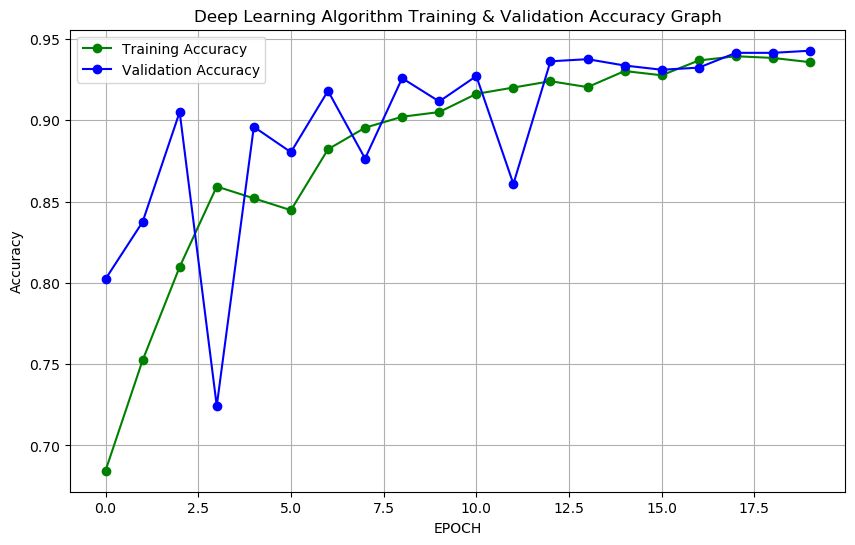

In [37]:
f = open('model/history.pckl', 'rb')
data = pickle.load(f)
f.close()
accuracy = data['accuracy']
loss = data['loss']
val_accuracy = data['val_accuracy']
val_loss = data['val_loss']

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('EPOCH')
plt.ylabel('Accuracy')
plt.plot(accuracy, 'ro-', color = 'green')
plt.plot(val_accuracy, 'ro-', color = 'blue')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.title('Deep Learning Algorithm Training & Validation Accuracy Graph')
plt.show()

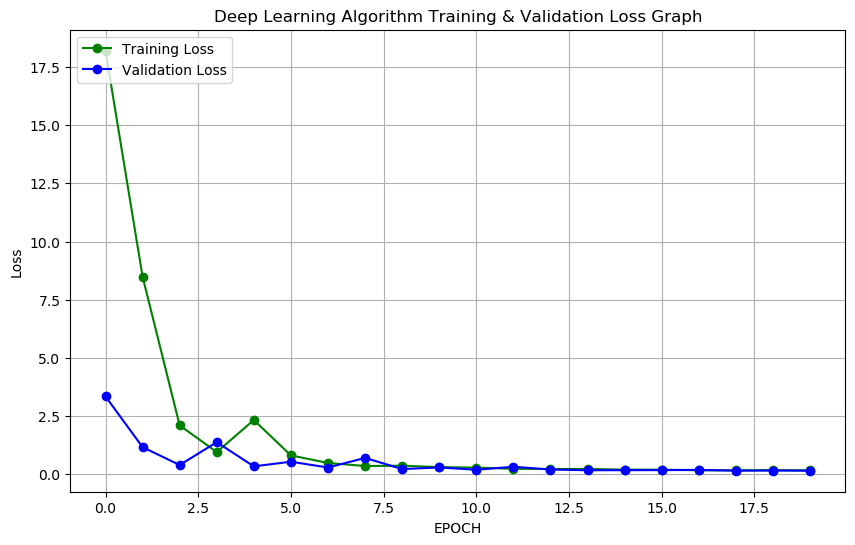

In [38]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('EPOCH')
plt.ylabel('Loss')
plt.plot(loss, 'ro-', color = 'green')
plt.plot(val_loss, 'ro-', color = 'blue')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
plt.title('Deep Learning Algorithm Training & Validation Loss Graph')
plt.show()


Deep Learning Algorithm with PCA features FSCORE  :  90.3709306462468
Deep Learning Algorithm with PCA features Accuracy  :  94.2782834850455
Deep Learning Algorithm with PCA features Precision : 90.74844334284326
Deep Learning Algorithm with PCA features Recall    : 90.0928498646966



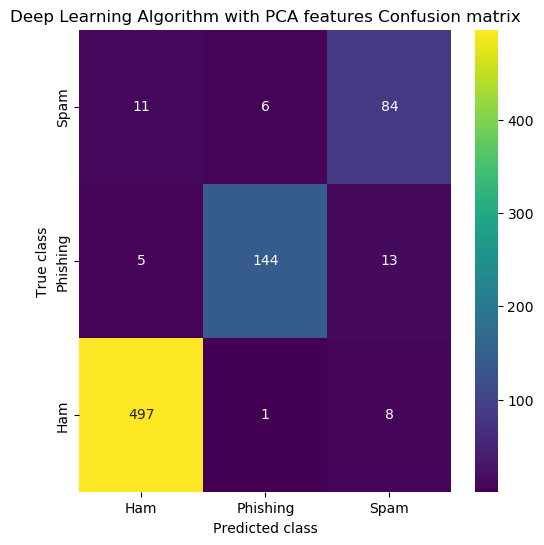

In [39]:
with open('model/model.json', "r") as json_file:
    loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
json_file.close()    
model.load_weights("model/model_weights.h5")
model._make_predict_function()
predict = model.predict(X_test)
predict = np.argmax(predict, axis=1)
y_true = np.argmax(y_test, axis=1)
calculateMetrics("Deep Learning Algorithm with PCA features", predict, y_true)